In [2]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('KNN_Project_Data.csv')

In [4]:
df.head()


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


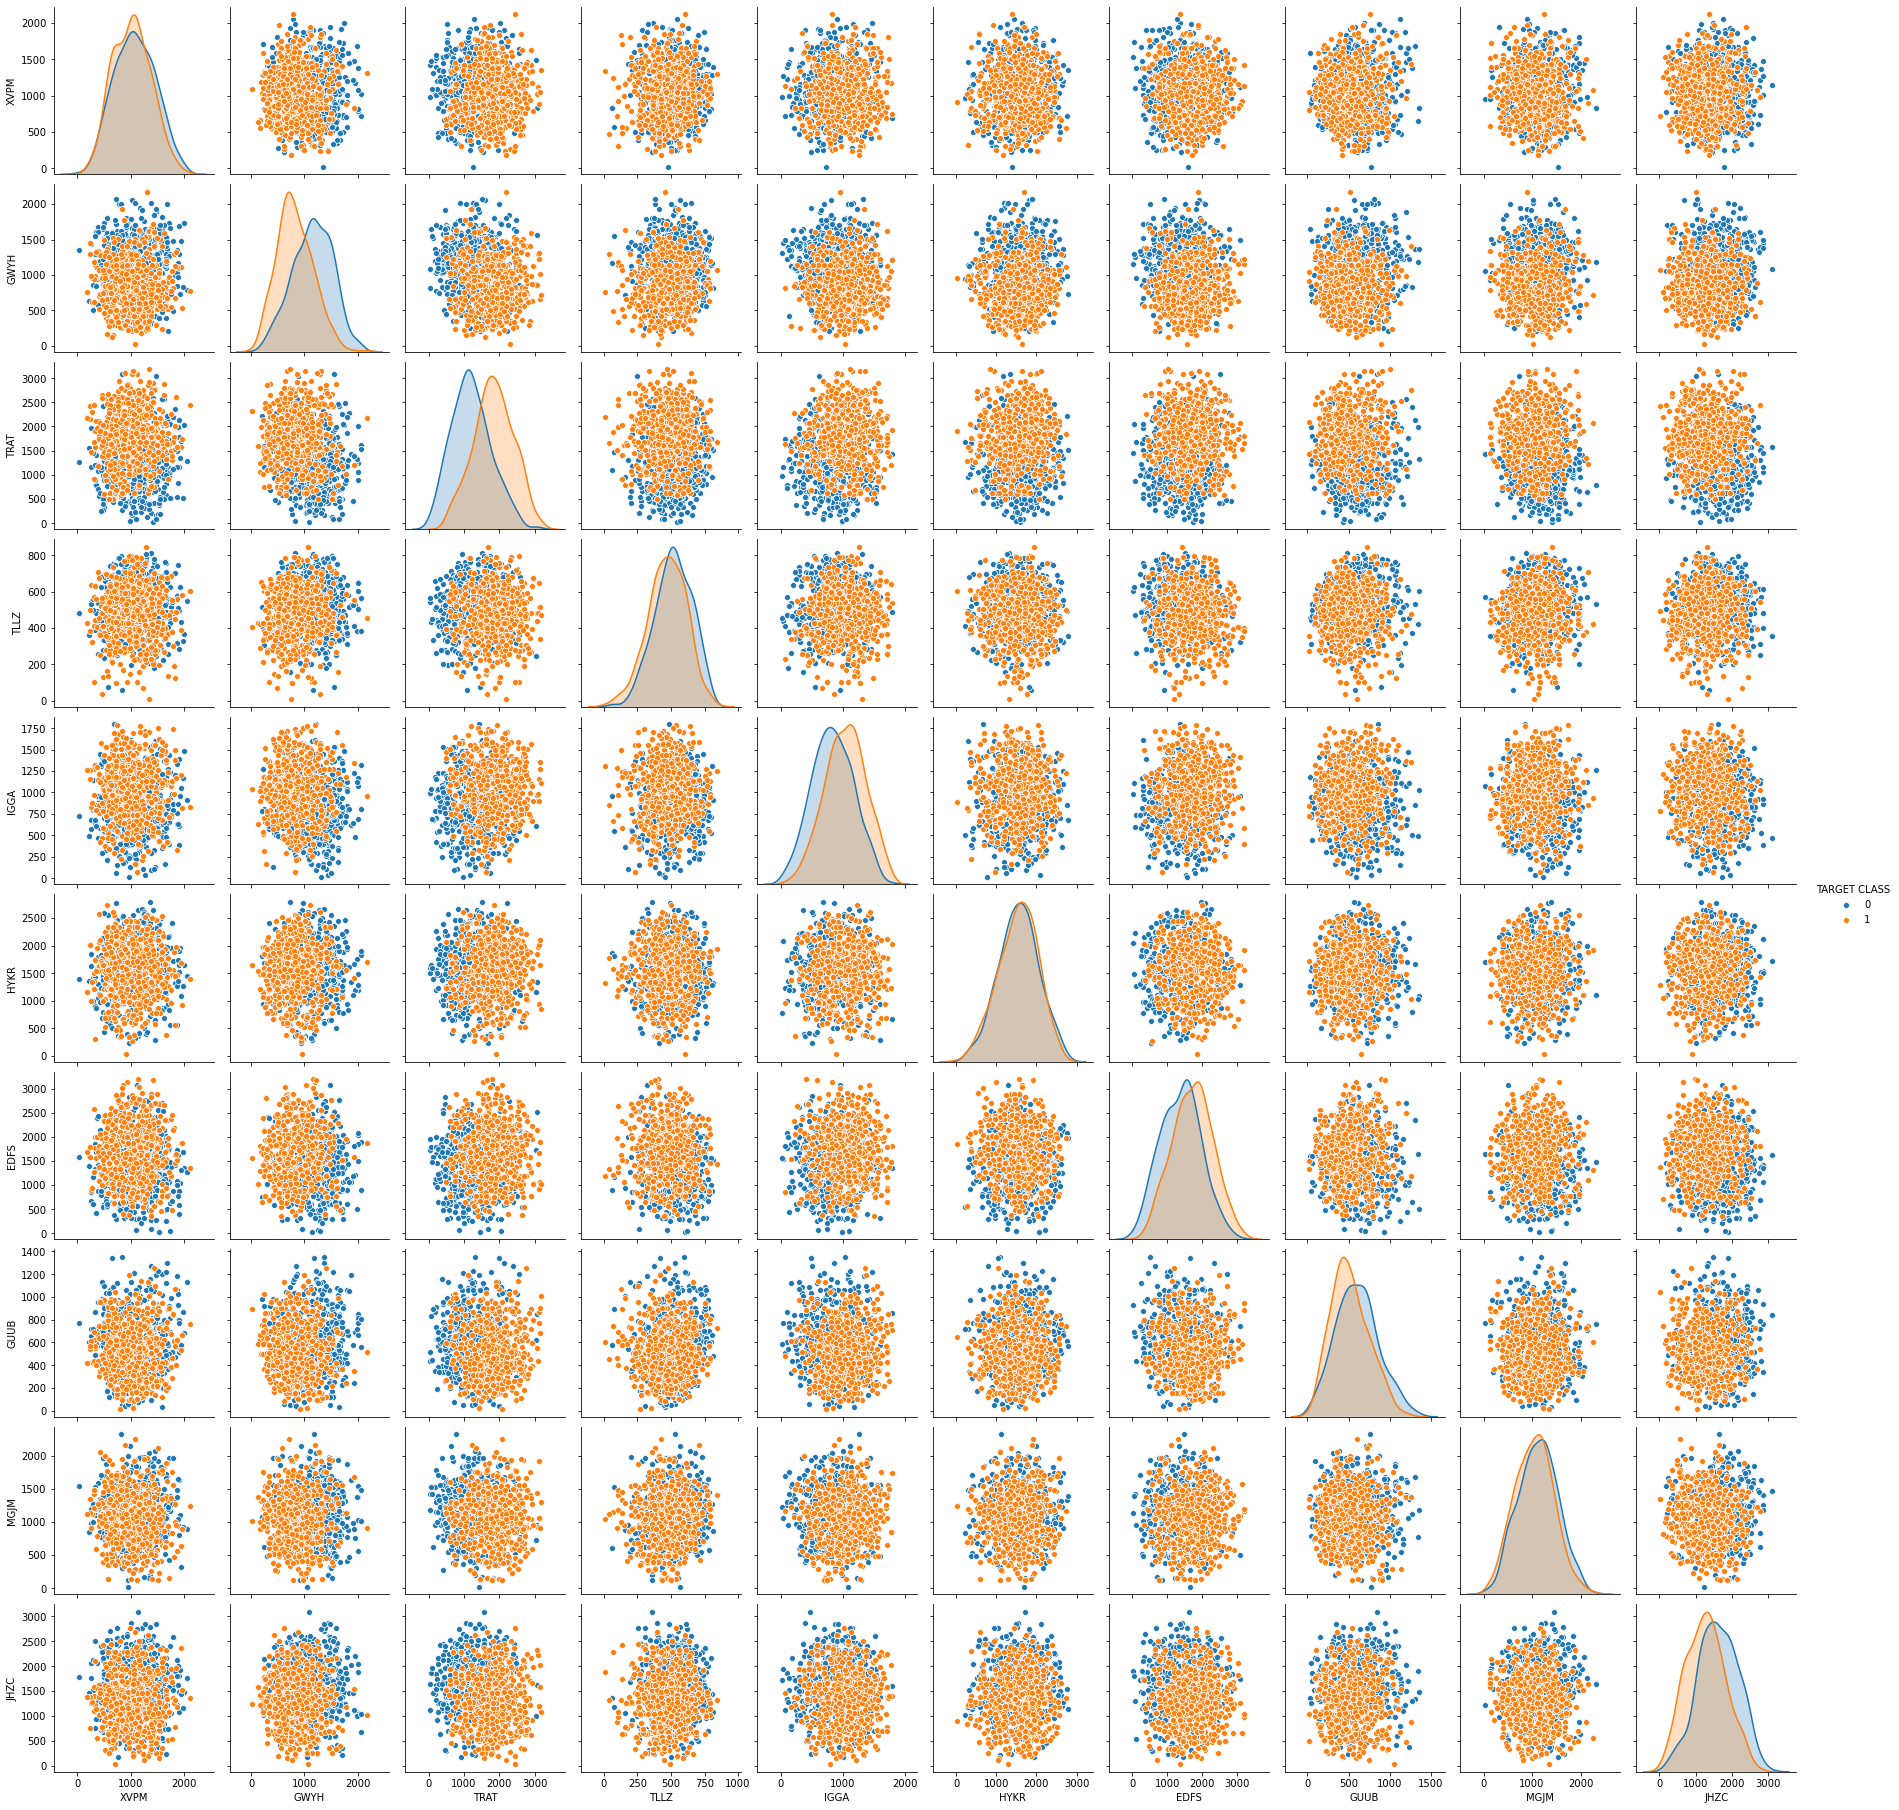

In [5]:
sns.pairplot(data=df,hue='TARGET CLASS')#visualization

In [6]:
from sklearn.preprocessing import StandardScaler#data preprocessing or data standarization
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [8]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [10]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [12]:
df_feat.head(3)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811


In [28]:
from sklearn.model_selection import train_test_split#train test split
X=df_feat

y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  

In [29]:
from sklearn.neighbors import KNeighborsClassifier#model classifier K nearest neighbours

In [30]:

knn=KNeighborsClassifier( n_neighbors=1)

In [31]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [32]:
pre=knn.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [35]:
print( classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330

[[119  44]
 [ 50 117]]


In [44]:
error=[]
for i in range(1,100):
    knn=KNeighborsClassifier( n_neighbors=i)
    knn.fit(X_train,y_train)
    pre=knn.predict(X_test)
    error.append(mean(pre!=y_test))

Text(0, 0.5, 'error rate')

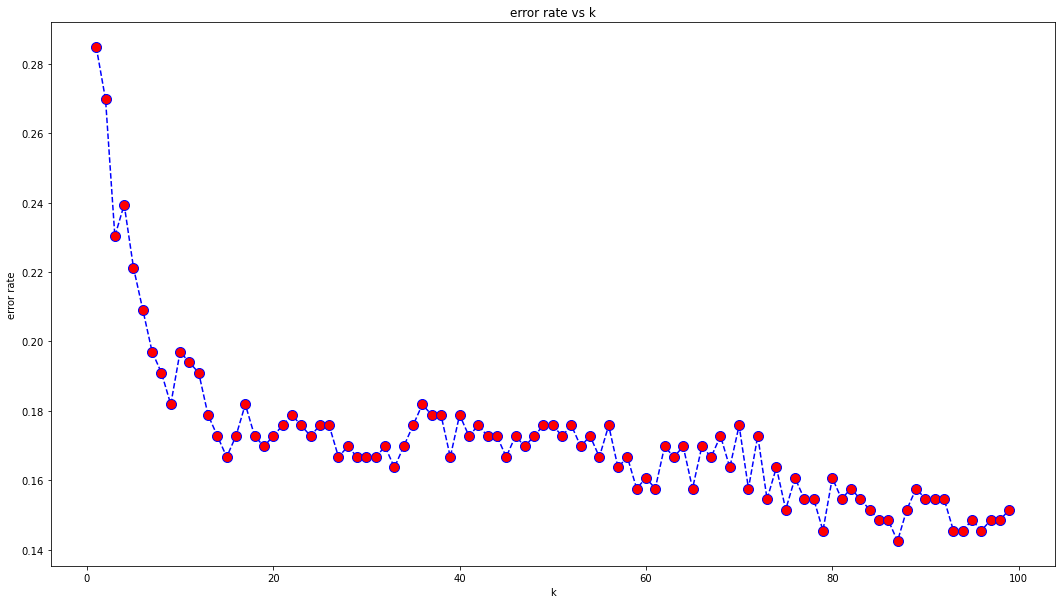

In [46]:
plt.figure(figsize=(18,10))
plt.plot(range(1,100),error,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('error rate vs k')
plt.xlabel('k')
plt.ylabel('error rate')

In [57]:
knn=KNeighborsClassifier(n_neighbors=87)
knn.fit(X_train,y_train)
z=knn.predict(X_test)
print(confusion_matrix(y_test,z))
print(classification_report(y_test,z))

[[138  25]
 [ 22 145]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       163
           1       0.85      0.87      0.86       167

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330

